## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [208]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [209]:
import pandas as pd
df=pd.read_csv(r'C:\Users\SaiF El-deen\Desktop\Numerical Optimization\Practicals\RegData.csv', sep=',',header=None)
df

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


In [210]:
# Getting values
x_points = df[0].values
y_points = df[1].values
print("X_data =",x_points)
print("y_data =",y_points)

X_data = [2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
y_data = [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Explore your data

In [211]:
print(x_points.shape)
x_points = x_points.reshape((-1,1))
print("X_data =\n",x_points)

print(y_points.shape)
y_points = y_points.reshape((-1,1))
print("y_data =\n",y_points)

(13,)
X_data =
 [[2.9000001 ]
 [6.69999981]
 [4.9000001 ]
 [7.9000001 ]
 [9.80000019]
 [6.9000001 ]
 [6.0999999 ]
 [6.19999981]
 [6.        ]
 [5.0999999 ]
 [4.69999981]
 [4.4000001 ]
 [5.80000019]]
(13,)
y_data =
 [[4.        ]
 [7.4000001 ]
 [5.        ]
 [7.19999981]
 [7.9000001 ]
 [6.0999999 ]
 [6.        ]
 [5.80000019]
 [5.19999981]
 [4.19999981]
 [4.        ]
 [4.4000001 ]
 [5.19999981]]


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [212]:
print("X_data =\n",x_points)
print("y_data =\n",y_points)

X_data =
 [[2.9000001 ]
 [6.69999981]
 [4.9000001 ]
 [7.9000001 ]
 [9.80000019]
 [6.9000001 ]
 [6.0999999 ]
 [6.19999981]
 [6.        ]
 [5.0999999 ]
 [4.69999981]
 [4.4000001 ]
 [5.80000019]]
y_data =
 [[4.        ]
 [7.4000001 ]
 [5.        ]
 [7.19999981]
 [7.9000001 ]
 [6.0999999 ]
 [6.        ]
 [5.80000019]
 [5.19999981]
 [4.19999981]
 [4.        ]
 [4.4000001 ]
 [5.19999981]]


#### Plot the original data (scatter plot of X,y)

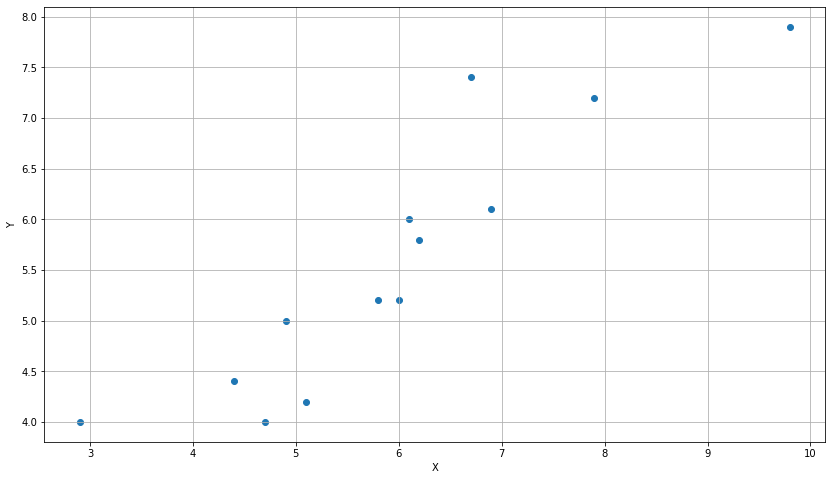

In [213]:
fig = plt.figure(figsize=(14,8))
fig1 = fig.add_subplot(111)
fig1.scatter(x_points,y_points);
plt.xlabel("X")
plt.ylabel("Y");
plt.grid()

## LR Full Implementation

In [214]:
def GD(x_data,y_data,epochs,batch_size,gamma,alpha): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
    vt = 0
    loss = []
    theta_iteration = []
    x_data = x_data.reshape((-1,1))
    y_data = y_data.reshape((-1,1))
    theta = np.zeros((2,1)) 
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones_like(x_batch),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta # 4x2 @ 2x1
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch)) # gamma 0 till 1 > 0 then no momentum  #// x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta = theta - vt
            theta_iteration.append(theta)
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    return theta , loss ,theta_iteration

theta =  [[0.22699668]
 [0.88319514]]
h =
 [[2.78826268]
 [6.14440397]
 [4.55465296]
 [7.20423839]
 [8.88230925]
 [6.32104325]
 [5.61448697]
 [5.7028064 ]
 [5.52616754]
 [4.73129182]
 [4.37801368]
 [4.11305539]
 [5.34952868]]


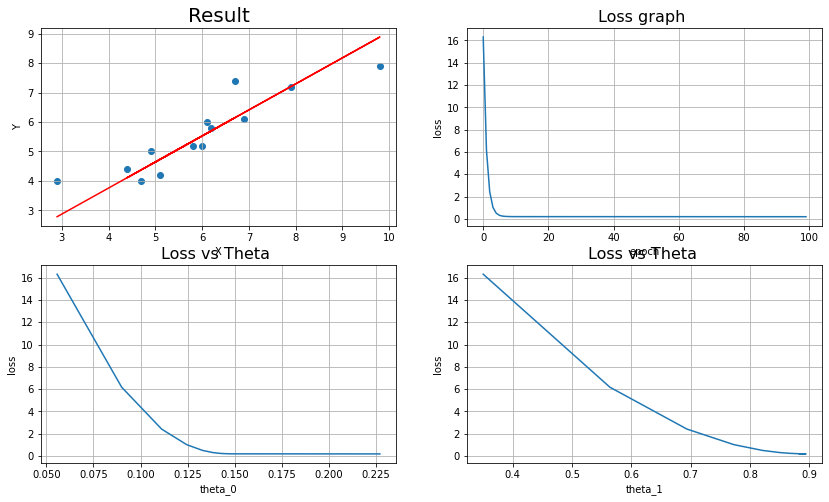

In [215]:
# Batch Gradient decent
theta,loss, theta_iteration = GD(x_points,y_points,batch_size=len(x_points),gamma=0,epochs=100,alpha=0.01)
print("theta = ",theta)

# print("theta trials =\n",theta_iteration)

# print("loss = ",loss)

# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])


# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h = theta[0] + theta[1]*x_points
print("h =\n",h)

fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");
plt.grid()

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");
plt.grid()

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");
plt.grid()

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");
plt.grid()

In [216]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 75.63025293243409 %


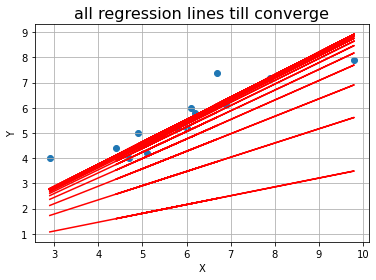

In [217]:
import time

plt.scatter(x_points,y_points)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)
    


plt.title("all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");
plt.grid()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [462]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline


In [463]:
import pandas as pd
df2=pd.read_csv(r'C:\Users\SaiF El-deen\Desktop\Numerical Optimization\Practicals\MultipleLR.csv', sep=',',header=None)
print(df2)

     0   1    2    3
0   73  80   75  152
1   93  88   93  185
2   89  91   90  180
3   96  98  100  196
4   73  66   70  142
5   53  46   55  101
6   69  74   77  149
7   47  56   60  115
8   87  79   90  175
9   79  70   88  164
10  69  70   73  141
11  70  65   74  141
12  93  95   91  184
13  79  80   73  152
14  70  73   78  148
15  93  89   96  192
16  78  75   68  147
17  81  90   93  183
18  88  92   86  177
19  78  83   77  159
20  82  86   90  177
21  86  82   89  175
22  78  83   85  175
23  76  83   71  149
24  96  93   95  192


In [464]:
# Getting values
x_points = df2.iloc[:,:-1].values
print("X_data =",x_points)
print("X_data shape is ",x_points.shape)

print()

y_points = df2.iloc[:,-1].values
print("y_data =",y_points)
print("y_data shape is ",y_points.shape)

# print()

# y_points = df2[3].values
# print("y_data =",y_points)
# print("y_data shape is ",y_points.shape)

# print()



# print()

# y_points = y_points.reshape((-1,1))
# print("y_data =",y_points)
# print("y_data shape is ",y_points.shape)

# print()


X_data = [[ 73  80  75]
 [ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]
 [ 53  46  55]
 [ 69  74  77]
 [ 47  56  60]
 [ 87  79  90]
 [ 79  70  88]
 [ 69  70  73]
 [ 70  65  74]
 [ 93  95  91]
 [ 79  80  73]
 [ 70  73  78]
 [ 93  89  96]
 [ 78  75  68]
 [ 81  90  93]
 [ 88  92  86]
 [ 78  83  77]
 [ 82  86  90]
 [ 86  82  89]
 [ 78  83  85]
 [ 76  83  71]
 [ 96  93  95]]
X_data shape is  (25, 3)

y_data = [152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]
y_data shape is  (25,)


In [465]:
# x1_points = df[0].values
# x2_points = df[1].values
# x3_points = df[2].values
# y_points = df[3].values
# print("x1_points =",x1_points)
# print("x2_points =",x2_pointAs)
# print("x3_points =",x3_points)
# print("y_points =",y_points)

In [466]:
# print(x1_points.shape)
# x1_points = x1_points.reshape((-1,1))
# print("x1_points =\n",x1_points)

# print(x2_points.shape)
# x2_points = x2_points.reshape((-1,1))
# print("x2_points =\n",x2_points)

# print(x3_points.shape)
# x3_points = x3_points.reshape((-1,1))
# print("x3_points =\n",x3_points)

# print(y_points.shape)
# y_points = y_points.reshape((-1,1))
# print("y_points =\n",y_points)

# print(x_points.shape)
# x_points = np.hstack((x1_points, x2_points,x3_points))
# xnew=np.c_(np.ones(x_points.shape[0]),x_points)
# print("x_points =\n",xnew)

# print("Length of x_points =",len(x_points))

In [467]:
# print(x_points.shape[1])

In [468]:
def GD(x_data,y_data,epochs,batch_size,gamma,alpha): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
    vt = 0
#     vt = np.zeros((x_data.shape[1]+1,1))
    y_data = y_data.reshape((-1,1))

    loss = []
    theta_iteration = []
#     theta = np.random.random(size=(x_data.shape[1]+1,1)) # theta = 4x1
    theta = np.zeros((x_data.shape[1]+1,1)) # theta = 4x1
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones((x_batch.shape[0],1)),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta 
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch)) # gamma 0 till 1 > 0 then no momentum  #// x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta = theta - vt
            theta_iteration.append(theta)
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    return theta , loss ,theta_iteration

theta =  [[0.00760393]
 [0.58930499]
 [0.59328266]
 [0.83873404]]
h =
 [[153.39453432]
 [185.02410821]
 [181.93053409]
 [198.59598808]
 [140.89490687]
 [104.66214321]
 [149.15508649]
 [111.25281008]
 [173.6325322 ]
 [161.90108026]
 [143.42701968]
 [141.88864542]
 [187.49961873]
 [155.25289617]
 [149.98984287]
 [188.133593  ]
 [147.50350766]
 [179.13901364]
 [178.57957558]
 [159.79837534]
 [174.83898586]
 [173.98434114]
 [166.5082477 ]
 [153.58736109]
 [191.43590456]]


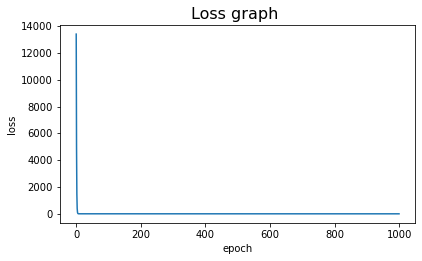

In [469]:
# Batch Gradient decent
theta,loss, theta_iteration = GD(x_points,y_points,batch_size=len(x_points),gamma=0.1,epochs=1000,alpha=0.00002)
print("theta = ",theta)
# print("theta trials =\n",theta_iteration)

# print("loss = ",loss)

# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])


# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h =  theta[0] +  x_points @ theta[1:]
print("h =\n",h)


fig = plt.figure(figsize=(14,8))

# fig1 =  fig.add_subplot(221)
# fig1.scatter(x_points,y_points)
# plt.plot(x_points,h,'r')
# plt.title("Result",fontsize=20)
# plt.xlabel("X")
# plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
# fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

# fig3 =  fig.add_subplot(223)
# fig3.plot(theta_iteration[:,0],loss)
# plt.title("Loss vs Theta ",fontsize=16);
# plt.xlabel("theta_0")
# plt.ylabel("loss");

# fig4 =  fig.add_subplot(224)
# fig4.plot(theta_iteration[:,1],loss)
# plt.title("Loss vs Theta ",fontsize=16);
# plt.xlabel("theta_1")
# plt.ylabel("loss");

In [470]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 98.46292236978633 %


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [222]:
from sklearn.linear_model import LinearRegression

In [223]:
import pandas as pd
df=pd.read_csv(r'C:\Users\SaiF El-deen\Desktop\Numerical Optimization\Practicals\RegData.csv', sep=',',header=None)
df

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


In [224]:
# Getting values
x_points = df[0].values
y_points = df[1].values
print("X_data =",x_points)
print("y_data =",y_points)
x_points = x_points.reshape((-1,1))
y_points = y_points.reshape((-1,1))
print("X_data =",x_points)
print("y_data =",y_points)

X_data = [2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
y_data = [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]
X_data = [[2.9000001 ]
 [6.69999981]
 [4.9000001 ]
 [7.9000001 ]
 [9.80000019]
 [6.9000001 ]
 [6.0999999 ]
 [6.19999981]
 [6.        ]
 [5.0999999 ]
 [4.69999981]
 [4.4000001 ]
 [5.80000019]]
y_data = [[4.        ]
 [7.4000001 ]
 [5.        ]
 [7.19999981]
 [7.9000001 ]
 [6.0999999 ]
 [6.        ]
 [5.80000019]
 [5.19999981]
 [4.19999981]
 [4.        ]
 [4.4000001 ]
 [5.19999981]]


#### Train the model (fit the model to the training data)

In [235]:
model = LinearRegression()
model.fit(x_points,y_points)

LinearRegression()

#### Predict y values using the trained model

In [226]:
y_pred = model.predict(x_points)

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

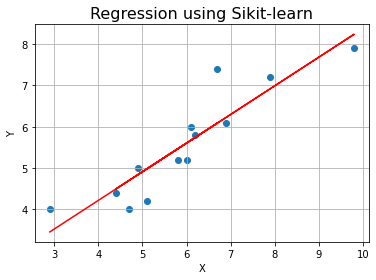

In [232]:
plt.scatter(x_points,y_points)
plt.plot(x_points,y_pred,c='r')
plt.title('Regression using Sikit-learn',fontsize=16)
plt.xlabel('X')
plt.ylabel('Y');
plt.grid()

#### Use R2 score to evaluate model output

In [233]:
print("r2_score =" ,r2_score(y_points,y_pred) * 100,"%")

r2_score = 82.13156778363778 %


### Repeat for Mulivariate

In [ ]:
from sklearn.linear_model import LinearRegression

In [237]:
import pandas as pd
df2=pd.read_csv(r'C:\Users\SaiF El-deen\Desktop\Numerical Optimization\Practicals\MultipleLR.csv', sep=',',header=None)
df2

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [257]:
# Getting values
x_points = df2.iloc[:,:-1].values
y_points = df2[3].values
print("X_data =",x_points)
print(x_points.shape)

print("y_data =",y_points)
y_points = y_points.reshape((-1,1))
print("y_data =",y_points)
print(y_points.shape)


X_data = [[ 73  80  75]
 [ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]
 [ 53  46  55]
 [ 69  74  77]
 [ 47  56  60]
 [ 87  79  90]
 [ 79  70  88]
 [ 69  70  73]
 [ 70  65  74]
 [ 93  95  91]
 [ 79  80  73]
 [ 70  73  78]
 [ 93  89  96]
 [ 78  75  68]
 [ 81  90  93]
 [ 88  92  86]
 [ 78  83  77]
 [ 82  86  90]
 [ 86  82  89]
 [ 78  83  85]
 [ 76  83  71]
 [ 96  93  95]]
(25, 3)
y_data = [152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]
y_data = [[152]
 [185]
 [180]
 [196]
 [142]
 [101]
 [149]
 [115]
 [175]
 [164]
 [141]
 [141]
 [184]
 [152]
 [148]
 [192]
 [147]
 [183]
 [177]
 [159]
 [177]
 [175]
 [175]
 [149]
 [192]]
(25, 1)


In [247]:
model = LinearRegression()
model.fit(x_points,y_points)

LinearRegression()

In [248]:
y_pred = model.predict(x_points)

In [452]:
# plt.scatter(x_points,y_points)
# plt.plot(x_points,y_pred,c='r')
# plt.title('Regression using Sikit-learn',fontsize=16)
# plt.xlabel('X')
# plt.ylabel('Y');
# plt.grid()

In [250]:
print("r2_score =" ,r2_score(y_points,y_pred) * 100,"%")

r2_score = 98.966157894484 %


# Singlevariate LR code

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline


In [198]:
import pandas as pd
df=pd.read_csv(r'C:\Users\SaiF El-deen\Desktop\Numerical Optimization\Practicals\RegData.csv', sep=',',header=None)
df

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


In [199]:
x_points = df[0].values
y_points = df[1].values
print("X_data =",x_points)
print("y_data =",y_points)

X_data = [2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
y_data = [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


In [200]:
print(x_points.shape)
x_points = x_points.reshape((-1,1))
print("X_data =\n",x_points)

print(y_points.shape)
y_points = y_points.reshape((-1,1))
print("y_data =\n",y_points)

(13,)
X_data =
 [[2.9000001 ]
 [6.69999981]
 [4.9000001 ]
 [7.9000001 ]
 [9.80000019]
 [6.9000001 ]
 [6.0999999 ]
 [6.19999981]
 [6.        ]
 [5.0999999 ]
 [4.69999981]
 [4.4000001 ]
 [5.80000019]]
(13,)
y_data =
 [[4.        ]
 [7.4000001 ]
 [5.        ]
 [7.19999981]
 [7.9000001 ]
 [6.0999999 ]
 [6.        ]
 [5.80000019]
 [5.19999981]
 [4.19999981]
 [4.        ]
 [4.4000001 ]
 [5.19999981]]


In [201]:
def GD(x_data,y_data,epochs,batch_size,gamma,alpha): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
    vt = 0
    loss = []
    theta_iteration = []
    x_data = x_data.reshape((-1,1))
    y_data = y_data.reshape((-1,1))
    theta = np.zeros((2,1)) 
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones_like(x_batch),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta # 4x2 @ 2x1
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch)) # gamma 0 till 1 > 0 then no momentum  #// x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta = theta - vt
            theta_iteration.append(theta)
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    return theta , loss ,theta_iteration

theta =  [[0.15867899]
 [0.89376835]]
loss =  [1.65374999e+01 3.96665160e-02 8.71699442e-01 2.26025761e-04
 2.45576853e-01 4.64505417e-04 2.19024419e-01 8.32160107e-04
 2.17455685e-01 9.19707692e-04 2.17140939e-01 9.39522355e-04
 2.16929591e-01 9.45397463e-04 2.16733490e-01 9.48482459e-04
 2.16540652e-01 9.51011625e-04 2.16348911e-01 9.53429794e-04]
h =
 [array([2.75060727]), array([6.14692673]), array([4.53814396]), array([7.219449]), array([8.91760894]), array([6.32568065]), array([5.61066581]), array([5.70004256]), array([5.52128906]), array([4.71689746]), array([4.35939004]), array([4.09125979]), array([5.34253556])]


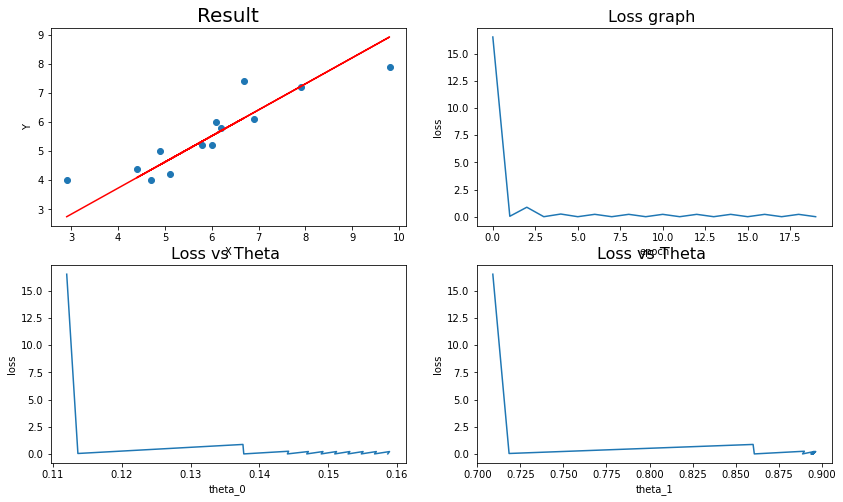

In [202]:
# Batch Gradient decent
theta,loss, theta_iteration = GD(x_points,y_points,batch_size=12,gamma=0,epochs=10,alpha=0.02)
print("theta = ",theta)
# print("theta trials =\n",theta_iteration)

print("loss = ",loss)
h = []
for x in x_points:
    h.append(theta[0] + theta[1]*x)
print("h =\n",h)

fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [203]:
print("r2_score =" ,r2_score(y,h) * 100,"%")

r2_score = 74.87368857710149 %


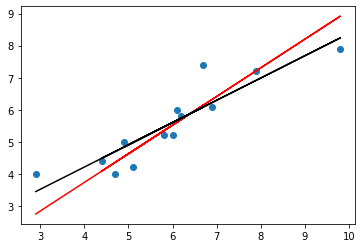

In [207]:
from sklearn import linear_model
plt.scatter(x_points,y_points)
plt.plot(x_points,h,color = 'red')
X= x_points.reshape(-1,1)
y= y_points
model = linear_model.LinearRegression()
model.fit(X,y)
plt.plot(x_points , model.predict(X) , color = 'black');